# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

This dataset tells the story about who  borrowers are

person_age → Borrower’s age profile and life stage

person_income → Earning capacity

person_home_ownership → Financial stability indicator (rent, own, mortgage)

person_emp_length → Employment stability

cb_person_cred_hist_length → Credit experience / maturity

when they ask for a loan, what they are asking for 

loan_intent → Purpose (education, personal, medical, venture, etc.)

loan_amnt → Loan size

loan_grade → Risk-based classification assigned by lender

loan_int_rate → Cost of borrowing

loan_percent_income → Debt burden relative to income
 
and how those choices translate into real outcomes.

It is designed for lenders and risk analysts who must decide whether a loan is affordable and sustainable, not just profitable. 

By examining borrower characteristics such as age,income,employment situation,credit history etc   and  loan purpose, size, interest rate, and debt burden, the analysis asks a simple question: which combinations lead to healthy loans, and which end in default? This can be uncovered through careful data cleaning and exploratory analysis, using clear visualizations and summary statistics to surface patterns, trade-offs, and risk signals, while remaining mindful that behind every data point is a real financial decision with long-term consequences.

# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import kagglehub
import os

# ---------------- Basic setup ----------------
today = pd.Timestamp.today().normalize()

# Dataset used: https://www.kaggle.com/datasets/laotse/credit-risk-dataset

# Download the dataset from Kaggle
path = kagglehub.dataset_download ("laotse/credit-risk-dataset")
print("Dataset downloaded to:", path)

# List available files
files = os.listdir(path)
print("Available files:", files)

# Load the CSV file
csv_file = os.path.join(path, files[0])
df_loan = pd.read_csv(csv_file)

print(f"\nDataset shape: {df_loan.shape}")
df_loan.head()

#path = kagglehub.dataset_download("username/dataset-name")

df_loan.describe()
df_loan.info()

# total nulls per column.Only two columns have nulls
print ("total nulls: ",df_loan.isnull().sum())

df_loan = df_loan.drop_duplicates(keep="first")
df_loan[df_loan.duplicated()] # no dups now

ModuleNotFoundError: No module named 'pandas'

In [ ]:
#fill nulls for employment length  with zero

df_loan["person_emp_length"] = df_loan["person_emp_length"].fillna(0)



#fill nulls for loan_int_rate  with median 


df_loan["loan_int_rate"] = df_loan["loan_int_rate"].fillna(
    df_loan["loan_int_rate"].median()
)

print ("total nulls: ",df_loan.isnull().sum())


total nulls:  person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [ ]:
# ===============================
# person_age checks
# ===============================
mask_age_missing = df_loan["person_age"].isna()
mask_age_invalid = (df_loan["person_age"] < 18) | (df_loan["person_age"] > 70 )

if df_loan.loc[mask_age_missing | mask_age_invalid, ["person_age"]].empty:
    print("No anomalies found for person_age.")
else:
    print("Anomalies found for person_age:")
    print(df_loan.loc[mask_age_missing | mask_age_invalid, ["person_age"]])

Anomalies found for person_age:
       person_age
81            144
183           144
575           123
747           123
32297         144
32355          78
32381          73
32416          94
32422          80
32432          73
32506          84
32521          73
32534          76


In [ ]:
# create an additional column to hold binary values for cb_person_default_on_file column using one hot encoding


one_hot = pd.get_dummies(df_loan["cb_person_default_on_file"], prefix ="cb_person_default_on_file", dtype=int)
df_loan1 = df_loan.join(one_hot)

df_loan1.drop(columns=["loan_status"], inplace=True,errors="ignore") # this is the target variable hence drop it
df_loan1.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,0,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,1,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,0,1


This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [ ]:

#mean and median only for numerical fields
num = df_loan1.select_dtypes(include=np.number)

numeric_summary = num.agg(["mean", "median"]).T
numeric_summary["mode"] = num.mode().iloc[0]   # take first mode for each column

numeric_summary

,mean,median,mode
person_age,27.747008,26.00,23.00
person_income,66091.640826,55000.00,60000.00
person_emp_length,4.659427,4.00,0.00
loan_amnt,9593.845632,8000.00,10000.00
loan_int_rate,11.014662,10.99,10.99
loan_percent_income,0.170250,0.15,0.10
cb_person_cred_hist_length,5.811297,4.00,2.00
cb_person_default_on_file_N,0.823235,1.00,1.00
cb_person_default_on_file_Y,0.176765,0.00,0.00


In [ ]:
# mode for categorical variable

cat = df_loan1.select_dtypes(exclude=np.number)
categorical_summary = pd.DataFrame({
    "mode": cat.mode().iloc[0]
})

categorical_summary

,mode
person_home_ownership,RENT
loan_intent,EDUCATION
loan_grade,A
cb_person_default_on_file,N


In [ ]:
#convert loan grade to numeric - Lets say A,B,C is low risk and rest are high risk

# low risk loan grades - D and below default to 1 in a additional binary column
df_loan1["loan_grade_risk_bin"] = (
    df_loan1["loan_grade"].isin(["D", "E", "F", "G"])
).astype(int)

df_loan1["loan_grade"].value_counts().sort_index()


A    10703
B    10387
C     6438
D     3620
E      963
F      241
G       64
Name: loan_grade, dtype: int64

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

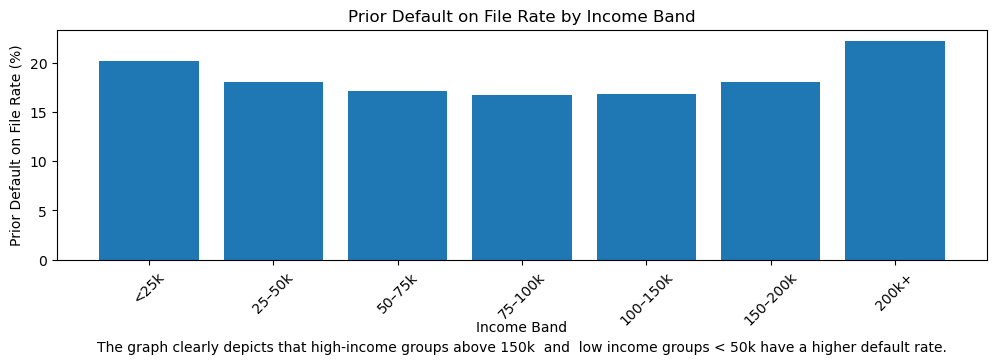

In [ ]:

import matplotlib.pyplot as plt
bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, df_loan1["person_income"].max()]
labels = [
    "<25k", "25–50k", "50–75k", "75–100k",
    "100–150k", "150–200k", "200k+"
]

df_loan1["income_band"] = pd.cut(
    df_loan1["person_income"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

prior_default_by_income = (
    df_loan1.groupby("income_band")["cb_person_default_on_file_Y"]
    .mean()
)

plt.figure(figsize=(12, 5))

plt.bar(
    prior_default_by_income.index.astype(str),
    prior_default_by_income.values * 100
)

plt.xlabel("Income Band", labelpad=-5)   # 👈 pushes x-label UP
plt.ylabel("Prior Default on File Rate (%)")
plt.title("Prior Default on File Rate by Income Band")

plt.xticks(rotation=45)

# 👇 Reserve sufficient space at bottom
plt.subplots_adjust(bottom=0.42)

# 👇 Place explanatory text clearly BELOW x-axis label
plt.text(
    0.5, -0.38,
    "The graph clearly depicts that high-income groups above 150k  and  low income groups < 50k have a higher default rate.",
    ha="center",
    va="center",
    transform=plt.gca().transAxes,
    fontsize=10
)

plt.show()


    
    